# Map insets

files needed = ('cb_2021_us_state_5m.zip') \[from [here](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.2021.html#list-tab-1883739534)\]

Our goal in this short notebook is to learn how to create insets. 

*Insets* are maps within maps that are used when one part of the object being mapped is far from the rest of the object. The [New York City subway map](https://new.mta.info/map/5256) is a classic example. Showing the true postion of Staten Island relative to Manhattan would waste a lot of space, so it is inset into the map. 

## Showing Alaska and Hawaii some respect

If we try and plot all 50 states, Alaska and Hawaii mess things up. Often, people will just drop Alaska and Hawaii and only plot the contiguous U.S. states. I have a friend from Alaska who does not like this. 

Let's add Alaska and Hawaii as insets to the contiguous U.S. states, or the 'lower 48' as my friend from Alaska calls it. Something like [this](https://stock.adobe.com/ee/images/map-of-the-usa-with-alaska-and-hawaii-inset/2635860), but without the random colors. Geez, Adobe. 

The process here is similar to what we did with the legend in the choropleths notebook. We add a new axis to the existing axis and plot to it. The difference here is that our new axis will be inside the existing axis, rather than adjacent to it.

In [2]:
# The usual suspects
import geopandas                            
import matplotlib.pyplot as plt             

# This is needed to create the inset in the figure
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

We have done this a few times now. Grab the state shape files (or find the ones you already have on your computer) and load them into a geodataframe.

In [3]:
states = geopandas.read_file('cb_2021_us_state_5m/cb_2021_us_state_5m.shp')

Plot the whole United States as it actually exists in space.

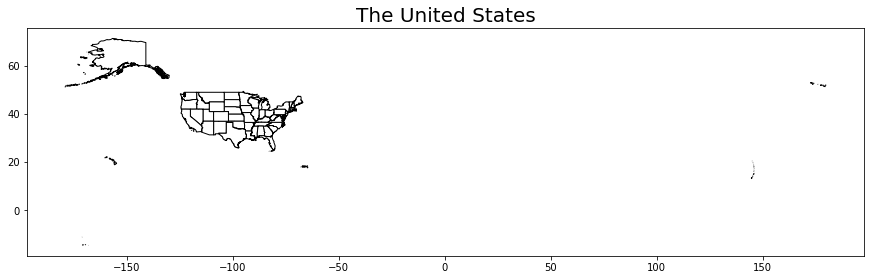

In [4]:
fig, gax = plt.subplots(figsize=(15,15))

states.plot(ax = gax, edgecolor='black',color='white')
gax.set_title('The United States', fontsize=20)

plt.show()

Oh boy. Alaska and Hawaii are drowning out the detail in the lower 48. We also have a problem with the some of the Aleutian Islands "wrapping around" and being plotted on the right side of the figure. 

First, let's break out the lower 48, Alaska, and Hawaii in separate DataFrames.

In [5]:
codes = states.STUSPS.unique()
others = ['HI', 'VI', 'PR', 'AS', 'MP', 'GU', 'AK']

lower_48 = states[~states['STUSPS'].isin(others)]
ak = states[states['STUSPS']=='AK']
hi = states[states['STUSPS']=='HI']


## What's wrong with Alaska?

Let's plot Alaska.

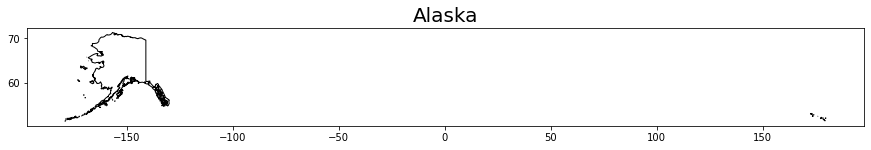

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
ak.plot(edgecolor='black',color='white', ax=ax)
ax.set_title('Alaska', fontsize=20)
plt.show()

We still have this problem with the Aleutian Islands. We can fix this by switching to a coordinate reference system (CRS) that centers the map on Alaska. This CRS is EPSG 8806. 

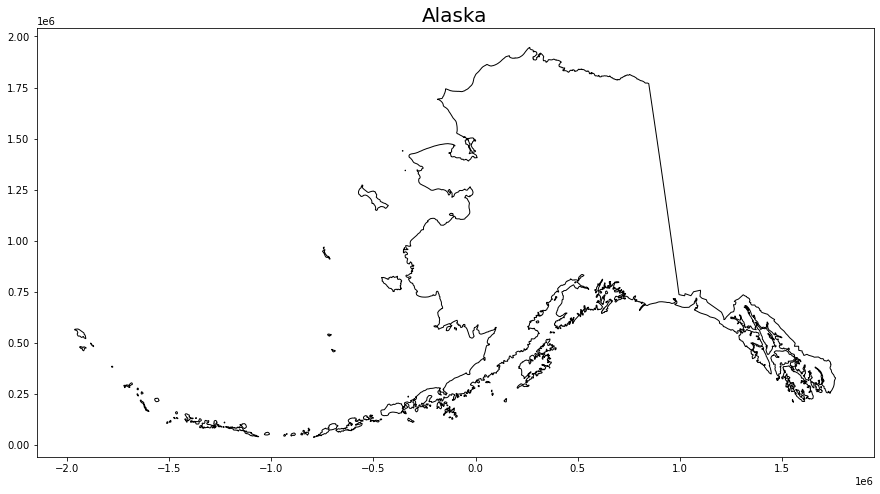

In [7]:
ak2 = ak.to_crs('EPSG:8806')

fig, ax = plt.subplots(figsize=(15,15))
ak2.plot(edgecolor='black',color='white', ax=ax)
ax.set_title('Alaska', fontsize=20)
plt.show()

Now we are in good shape. 

## Adding Alaska to the map

To create an inset, we create a new axis set into the original axis. We need the `.inset_axes()` method

```python 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
```

We imported `inset_axis` in the first code cell above. To create the inset we use

```python
axins = inset_axes(gax, width='100%', height='100%',  
                   bbox_to_anchor=(-.05, 0, 0.3, 0.3),
                   bbox_transform=gax.transAxes )
```

The `bbox_transform=gax.tranAxes` says that the units in the `bbox_to_anchor` argument are the proportions of the original axes. For example, we put the left corner of the inset at (-0.5, 0) and the upper right corner at (0.3, 0.3).

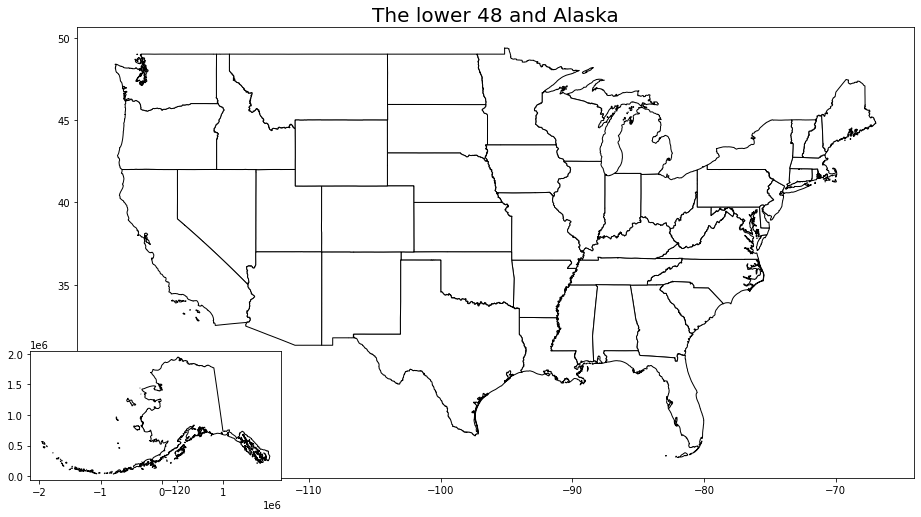

In [8]:
fig, gax = plt.subplots(figsize=(15,15))

lower_48.plot(ax = gax, edgecolor='black',color='white')
gax.set_title('The lower 48 and Alaska', fontsize=20)
#plt.axis('off')

# Creat the inset. 
axins = inset_axes(gax,width='100%', height='100%',  
                   bbox_to_anchor=(-.05, 0, 0.3, 0.3),
                   bbox_transform=gax.transAxes )

# Plot Alaska on the inset axes. 
ak2.plot(ax=axins, edgecolor='black', color='white')
#plt.axis('off')

plt.show()

Once we drop the axes, this looks good. 

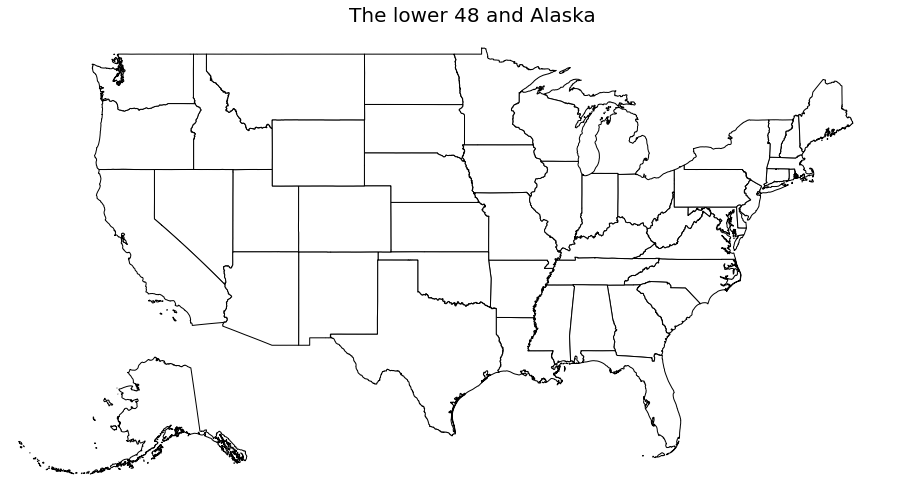

In [9]:
fig, gax = plt.subplots(figsize=(15,15))

lower_48.plot(ax = gax, edgecolor='black',color='white')
gax.set_title('The lower 48 and Alaska', fontsize=20)
plt.axis('off')

# Creat the inset. 
axins = inset_axes(gax,width='100%', height='100%',  
                   bbox_to_anchor=(-.05, 0, 0.3, 0.3),
                   bbox_transform=gax.transAxes )

# Plot Alaska on the inset axes. 
ak2.plot(ax=axins, edgecolor='black', color='white')
plt.axis('off')

plt.show()

## Practice: Squeezing in Hawaii

 Add Hawaii to our map. 

1. Plot Hawaii by itself. Does it look okay?

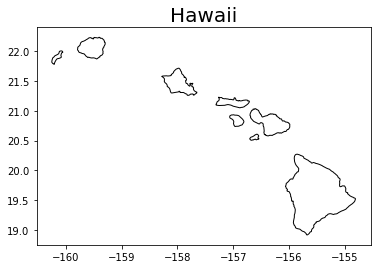

In [11]:
# 1 Looks okay to me.
ax = hi.plot(facecolor='white', edgecolor='black')
ax.set_title('Hawaii', fontsize=20)
plt.show()

2. Create another inset axis and add Hawaii to our plot from above. You will need to experiment with the size and location of the axis to make it look right. I find it helpful to leave the axis on while you do this and turn the axis off once you are happy. 

Here are [the details](https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html) on `inset_axis` if you are interested. 

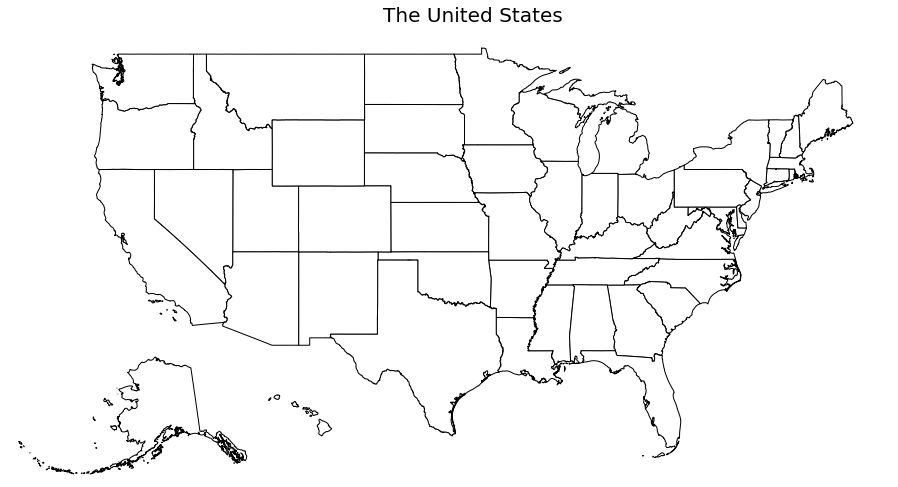

In [13]:
#2 Create a second inset axes. Plot Hawaii on it.

fig, gax = plt.subplots(figsize=(15,15))

lower_48.plot(ax = gax, edgecolor='black',color='white')
gax.set_title('The United States', fontsize=20)

# Plotting Alaska
plt.axis('off')
axins1 = inset_axes(gax, width='100%', height='100%',  bbox_to_anchor=(-.05, 0, 0.3, 0.3),
                   bbox_transform=gax.transAxes )

ak2.plot(ax=axins1, edgecolor='black', color='white')
plt.axis('off')


# Plotting Hawaii  
axins2 = inset_axes(gax,width='100%', height='100%',  
                    bbox_to_anchor=(.25, .1, 0.1, 0.1),
                    bbox_transform=gax.transAxes )

hi.plot(ax=axins2, edgecolor='black', color='white')
plt.axis('off')

#plt.savefig('us.svg')

plt.show()